In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:

parameters = {
    'UCS': {'mean': 21.56, 'std': 4.9, 'min': 17.08 , 'max':28.04 , 'size': 300},
    'BTS': {'mean': 4.49, 'std': 0.37, 'min': 3.67 , 'max': 5.48 , 'size': 300},
    'RQD': {'mean': 0.25, 'std': 1.53, 'min':0.21 , 'max': 0.3 , 'size': 300}, 
    'ICR': {'mean': 31.25, 'std': 8.94, 'min':24.4 , 'max': 36.57 , 'size': 300}, 
}

In [13]:
# Define correlation matrix based on known correlations between variables
correlation_matrix = np.array([
    [1.0, 0.69, 0.75, -0.85],   # correlations with UCS
    [0.69, 1.0, 0.1, 0.4],   # correlations with BTS
    [0.75, 0.71, 1.0, 0.25],  # correlations with RQD
    [-0.85, -0.73, -0.8, 1.0]   # correlations with ICR
])

E:\Users\aibyn.zeinulla\AppData\Local\Temp\ipykernel_19360\3687130936.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  initial_data = np.random.multivariate_normal(mean=means, cov=covariance_matrix, size=300)


         UCS       BTS       RQD        ICR
0  21.184158  4.512877  0.247427  32.414008
1  23.669273  4.633373  0.246906  29.572663
2  26.057500  4.570600  0.246691  28.327774
3  25.823580  4.642611  0.261864  27.891159
4  18.687993  4.101250  0.239710  30.372808
              UCS         BTS         RQD         ICR
count  300.000000  300.000000  300.000000  300.000000
mean    22.297407    4.710480    0.251433   30.626205
std      2.306671    0.289542    0.015069    2.121765
min     17.080000    3.670000    0.210000   24.400000
25%     20.860718    4.528774    0.242497   29.118430
50%     22.282431    4.707245    0.251190   30.604549
75%     23.871228    4.933884    0.261018   32.179638
max     28.040000    5.480000    0.300000   36.570000


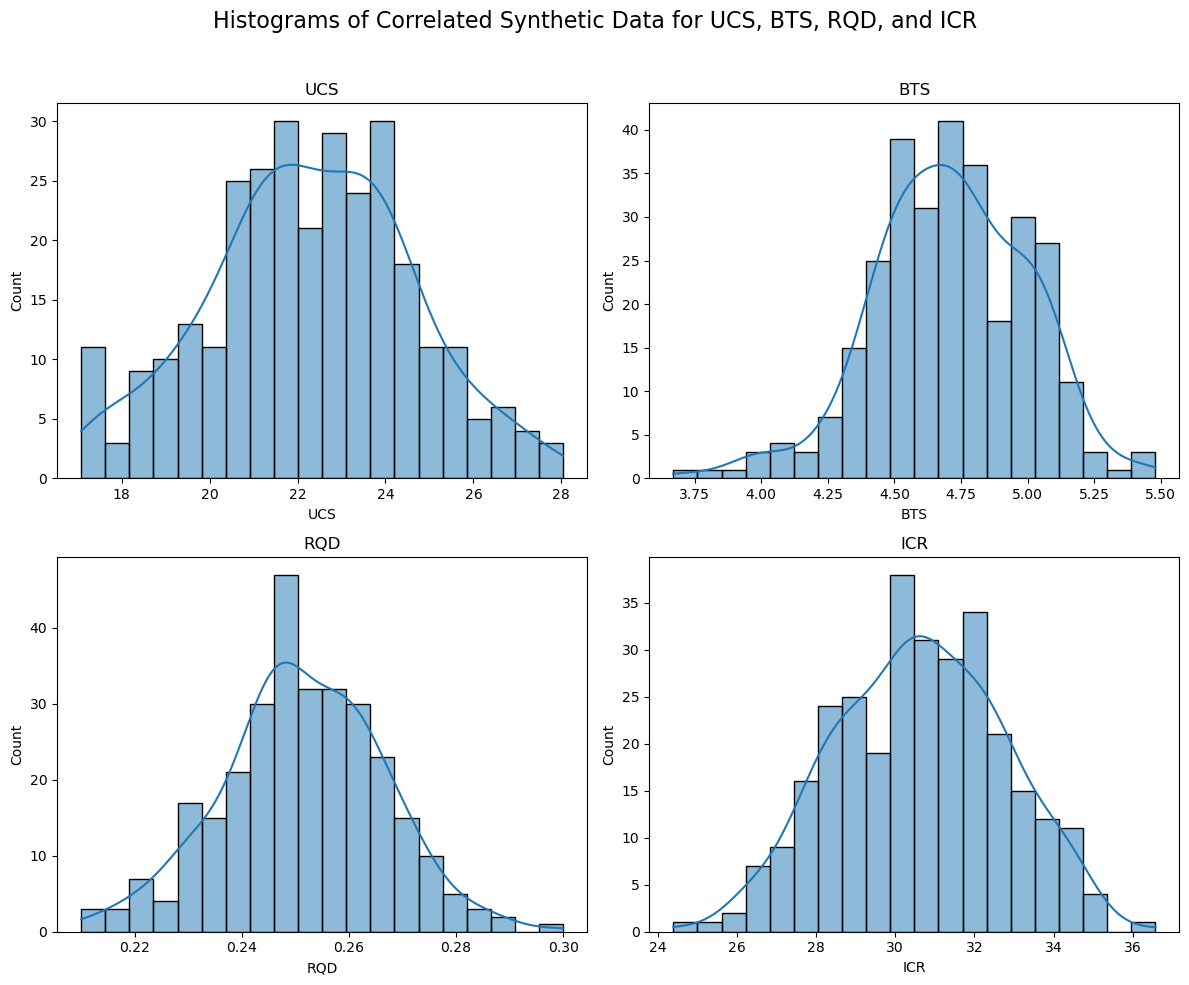

Generated Data Correlation Matrix:
           UCS       BTS       RQD       ICR
UCS  1.000000  0.585142  0.768715 -0.780521
BTS  0.585142  1.000000  0.692679 -0.523497
RQD  0.768715  0.692679  1.000000 -0.647225
ICR -0.780521 -0.523497 -0.647225  1.000000


In [19]:
# Mean vector and standard deviation vector
means = [parameters[feature]['mean'] for feature in parameters]
stds = [parameters[feature]['std'] for feature in parameters]

# Compute covariance matrix
covariance_matrix = np.outer(stds, stds) * correlation_matrix

# Generate correlated synthetic data
initial_data = np.random.multivariate_normal(mean=means, cov=covariance_matrix, size=300)

# Mean and std vectors for the variables
means = [parameters[key]['mean'] for key in parameters]
stds = [parameters[key]['std'] for key in parameters]
mins = [parameters[key]['min'] for key in parameters]
maxs = [parameters[key]['max'] for key in parameters]
size = parameters['UCS']['size']

# Step 2: Rescale each variable to meet min and max bounds
def rescale_to_bounds(data, min_val, max_val):
    scaled_data = (data - data.min()) / (data.max() - data.min())  # Scale to 0-1
    return scaled_data * (max_val - min_val) + min_val            # Scale to min-max

rescaled_data = np.empty_like(initial_data)
for i, key in enumerate(parameters):
    rescaled_data[:, i] = rescale_to_bounds(initial_data[:, i], mins[i], maxs[i])

# Step 3: Create a DataFrame and verify correlations and bounds
columns = list(parameters.keys())
synthetic_df = pd.DataFrame(rescaled_data, columns=columns)

# Display the first few rows of the synthetic data
print(synthetic_df.head())
print(synthetic_df.describe())

# Plot histograms to visualize the generated data distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Histograms of Correlated Synthetic Data for UCS, BTS, RQD, and ICR", fontsize=16)

sns.histplot(synthetic_df['UCS'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("UCS")

sns.histplot(synthetic_df['BTS'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("BTS")

sns.histplot(synthetic_df['RQD'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("RQD")

sns.histplot(synthetic_df['ICR'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("ICR")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Optional: Display the correlation matrix to verify
print("Generated Data Correlation Matrix:\n", synthetic_df.corr())

In [21]:
synthetic_df.to_csv("Aidyn_data.csv")